### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [279]:
data = pd.read_csv('data/coupons.csv')

In [281]:
data.head()
print(f"Shape of bar coupons DataFrame: {data.shape}")

Shape of bar coupons DataFrame: (12684, 26)


2. Investigate the dataset for missing or problematic data.

In [283]:
missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [285]:
# Drop 'car' column due to high number of missing values
data = data.drop(columns=['car'])

# Fill missing values in the coupon-related columns with 0 (no coupon accepted)
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].fillna("never")

# Check for missing values again
missing_values_after_imputation = data.isnull().sum()
print(missing_values_after_imputation)


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [244]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [287]:
# Calculate the total number of observations
total_observations = len(data)

# Calculate the number of observations where the coupon was accepted (Y = 1)
accepted_coupons = data[data['Y'] == 1].shape[0]

print(f"Number of accepted bar coupons: {accepted_coupons}")
print(f"Total number of bar coupons: {total_observations}")

# Calculate the proportion of accepted coupons
proportion_accepted = accepted_coupons / total_observations

# Display the proportion as a percentage
proportion_percentage = proportion_accepted * 100
print(f"Proportion of accepted coupons: {proportion_percentage:.4f}%")


Number of accepted bar coupons: 7210
Total number of bar coupons: 12684
Proportion of accepted coupons: 56.8433%


5. Use a bar plot to visualize the `coupon` column.

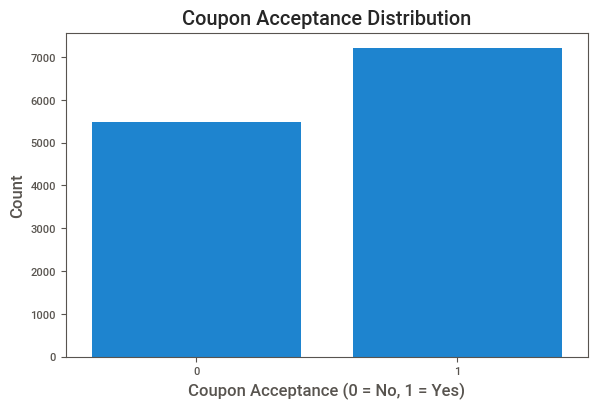

In [289]:
#To visualiz, Count the number of acceptances (Y = 1) and rejections (Y = 0)
coupon_counts = data['Y'].value_counts()

# Create the bar plot using seaborn
plt.figure(figsize=(6, 4))

# Plot without the deprecated palette usage
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

# Label the axes and title
plt.xlabel('Coupon Acceptance (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Coupon Acceptance Distribution')

# Show the plot
plt.show()

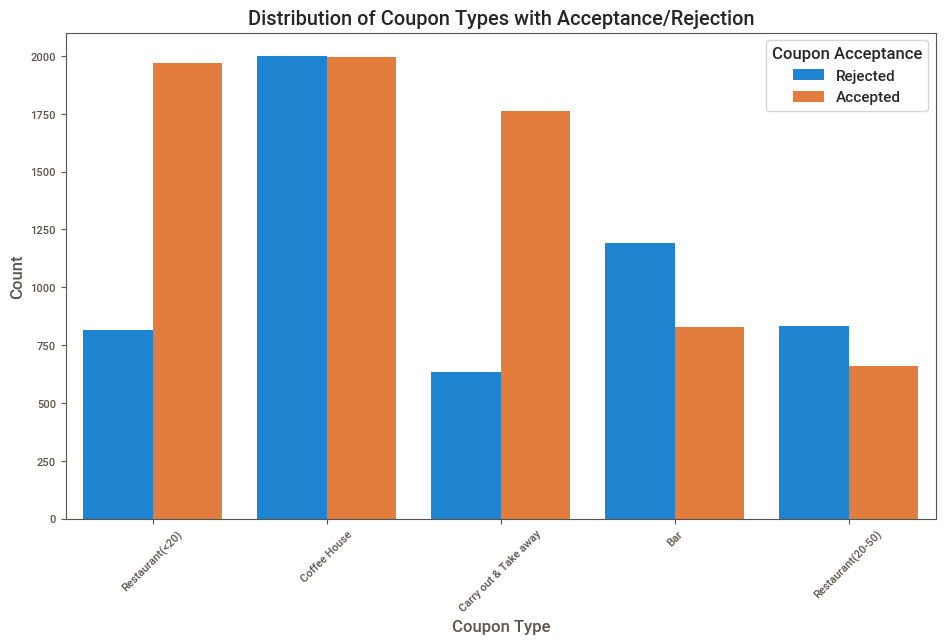

In [291]:
# Create a bar plot to show the distribution of coupon types with respect to acceptance/rejection
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=data, hue='Y')  # hue='Y' distinguishes accepted vs rejected
plt.title('Distribution of Coupon Types with Acceptance/Rejection')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Coupon Acceptance', labels=['Rejected', 'Accepted'])
plt.show()


6. Use a histogram to visualize the temperature column.

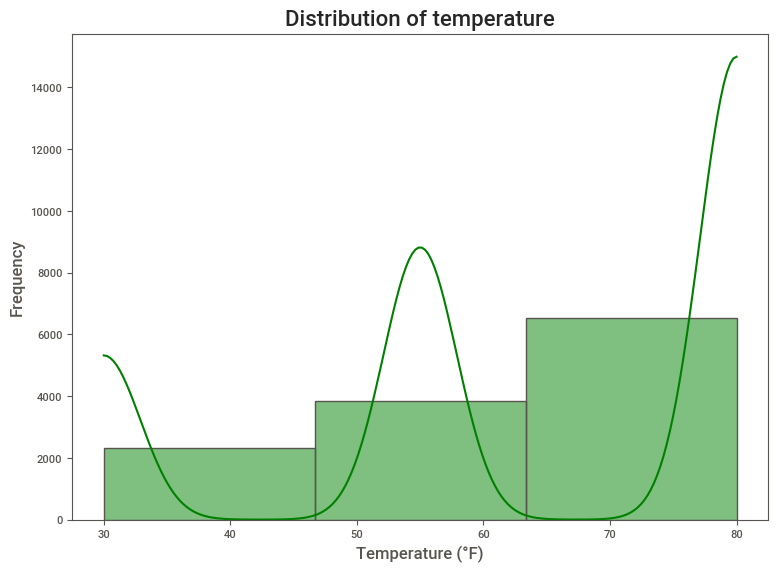

In [293]:
# Plotting a histogram for the Temperature column

plt.figure(figsize=(8, 6))

# Use seaborn to create a countplot (a type of bar plot, ideal for categorical data)
sns.histplot(data['temperature'], bins=len(data['temperature'].unique()), kde=True, color='green')

# Customize the plot
plt.title('Distribution of temperature', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [295]:
# Filter the dataset to only include rows where a Bar coupon was given
bar_coupons = data[data['coupon'] == 'Bar']  # Exclude 'never' as it means no bar coupon given

# Check the shape of the new DataFrame to confirm it's correct
print(f"Shape of bar coupons DataFrame: {bar_coupons.shape}")
bar_coupons.head()


Shape of bar coupons DataFrame: (2017, 25)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [297]:
# Calculate the number of accepted bar coupons (Y == 1)
accepted_bar_coupons = bar_coupons[bar_coupons['Y'] == 1].shape[0]

# Total number of bar coupons
total_bar_coupons = bar_coupons.shape[0]

print(f"Number of accepted bar coupons: {accepted_bar_coupons}")
print(f"Total number of bar coupons: {total_bar_coupons}")

# Proportion of accepted bar coupons
proportion_accepted_bar_coupons = accepted_bar_coupons / total_bar_coupons

# Print the proportion as a percentage
print(f"Proportion of accepted bar coupons: {proportion_accepted_bar_coupons * 100:.2f}%")

Number of accepted bar coupons: 827
Total number of bar coupons: 2017
Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [299]:
# Group 1: People who go to a bar 3 or fewer times a month (includes 'never', 'less1', '1~3')
group1 = bar_coupons.query("Bar in ['never', 'less1', '1~3']")

# Group 2: People who go to a bar more than 3 times a month (includes '4~8', 'gt8')
group2 = bar_coupons.query("Bar in ['4~8', 'gt8']")

# Calculate acceptance rates for both groups
acceptance_group1 = group1[group1['Y'] == 1].shape[0] / group1.shape[0]
acceptance_group2 = group2[group2['Y'] == 1].shape[0] / group2.shape[0]

# Print the acceptance rates
print(f"Acceptance rate for people who go to a bar 3 or fewer times: {acceptance_group1 * 100:.2f}%")
print(f"Acceptance rate for people who go to a bar more than 3 times: {acceptance_group2 * 100:.2f}%")


Acceptance rate for people who go to a bar 3 or fewer times: 37.07%
Acceptance rate for people who go to a bar more than 3 times: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [301]:
# Check for non-numeric values in the 'age' column
print(bar_coupons['age'].unique())

# Replace categorical 'age' values with numeric equivalents
bar_coupons['age'] = bar_coupons['age'].replace({
    'below21': 20,        # 'below21' can be treated as age 20
    '50plus': 50,         # '50plus' can be treated as age 50 or higher
})

# Convert the 'age' column to numeric (now it should only contain valid numeric values)
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'])

# Filter Group 1 - Drivers who go to a bar more than once a month (4~8 or gt8) and are over the age of 25
group1 = bar_coupons.query("Bar in ['4~8', 'gt8'] and age > 25")

# Filter Group 2 - All others who do not fit the above criteria
group2 = bar_coupons.query("not (Bar in ['4~8', 'gt8'] and age > 25)")

# Calculate the acceptance rate for both groups
acceptance_group1 = group1[group1['Y'] == 1].shape[0] / group1.shape[0]
acceptance_group2 = group2[group2['Y'] == 1].shape[0] / group2.shape[0]

# Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {acceptance_group1 * 100:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_group2 * 100:.2f}%")


['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Acceptance rate for drivers who go to a bar more than once a month and are over 25: 77.21%
Acceptance rate for all other drivers: 38.38%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [303]:
#  Filter Group 1 - Drivers who go to a bar more than once a month (4~8 or gt8),
#  had passengers that were not a kid, and had occupations other than farming, fishing, or forestry
group1 = bar_coupons.query(
    "Bar in ['4~8', 'gt8'] and passanger != 'Kid' and occupation not in ['farming', 'fishing', 'forestry']"
)

# Filter Group 2 - All others who do not fit the above criteria
group2 = bar_coupons.query(
    "not (Bar in ['4~8', 'gt8'] and passanger != 'Kid' and occupation not in ['farming', 'fishing', 'forestry'])"
)

# Calculate the acceptance rate for both groups
acceptance_group1 = group1[group1['Y'] == 1].shape[0] / group1.shape[0]
acceptance_group2 = group2[group2['Y'] == 1].shape[0] / group2.shape[0]

# Print the results
print(f"Acceptance rate for drivers who go to a bar more than once a month, had passengers not a kid, "
      f"and occupations other than farming, fishing, or forestry: {acceptance_group1 * 100:.2f}%")

print(f"Acceptance rate for all other drivers: {acceptance_group2 * 100:.2f}%")


Acceptance rate for drivers who go to a bar more than once a month, had passengers not a kid, and occupations other than farming, fishing, or forestry: 76.88%
Acceptance rate for all other drivers: 37.07%


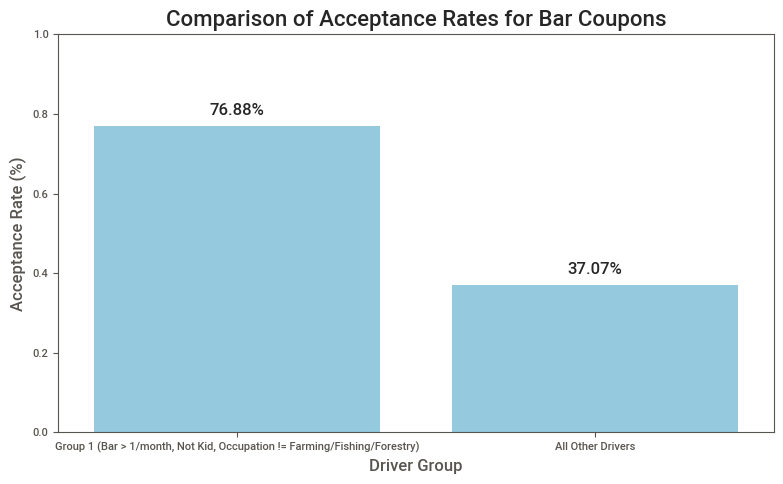

In [305]:
# Define the acceptance rates for both groups
acceptance_rates = {
    "Group 1 (Bar > 1/month, Not Kid, Occupation != Farming/Fishing/Forestry)": acceptance_group1,
    "All Other Drivers": acceptance_group2
}

# Prepare the data for plotting
group_labels = list(acceptance_rates.keys())
acceptance_values = list(acceptance_rates.values())

#  Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=group_labels, y=acceptance_values, color='skyblue')  # Using color instead of palette

# Customize the plot
plt.title('Comparison of Acceptance Rates for Bar Coupons', fontsize=16)
plt.xlabel('Driver Group', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (percentage scale)

# Display the acceptance rate as percentage values on top of the bars
for i, v in enumerate(acceptance_values):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', va='bottom', fontsize=12)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [307]:
#  Clean up column names (strip leading/trailing spaces if any)
bar_coupons = bar_coupons.copy()   
bar_coupons.columns = bar_coupons.columns.str.strip()

#   Convert 'RestaurantLessThan20' to numeric using the mapping
restaurant_mapping = {
    'less1': 0,  # Less than 1 time
    '1~3': 1,    # 1 to 3 times
    '4~8': 4,    # 4 to 8 times
    'gt8': 9,    # Greater than 8 times (or any value greater than 8)
    'never': 0   # Never (no visits)
}
bar_coupons['RestaurantLessThan20_numeric'] = bar_coupons['RestaurantLessThan20'].map(restaurant_mapping)

#  Clean up 'income' column
bar_coupons['income'] = bar_coupons['income'].astype(str)
bar_coupons['income_lower'] = bar_coupons['income'].str.extract(r'\$(\d+)').astype(float)

# Ensure 'age' is numeric (it may contain strings or missing values)
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'])

# Step 5: Filter Group 1 - Drivers who go to a bar more than once a month, have passengers not a kid, and are not widowed
group1 = bar_coupons.loc[
    (bar_coupons['Bar'].isin(['4~8', 'gt8'])) & 
    (bar_coupons['passanger'] != 'Kid') & 
    (bar_coupons['maritalStatus'] != 'Widowed')
]

#   Filter Group 2 - Drivers who go to a bar more than once a month and are under 30
group2 = bar_coupons.loc[
    (bar_coupons['Bar'].isin(['4~8', 'gt8'])) & 
    (bar_coupons['age'] < 30)
]

#   Filter Group 3 - Drivers who go to cheap restaurants more than 4 times a month and income lower than 50K
group3 = bar_coupons.loc[
    ((bar_coupons['RestaurantLessThan20_numeric'] == 4) | 
     (bar_coupons['RestaurantLessThan20_numeric'] == 9)) & 
    (bar_coupons['income_lower'] < 50000)
]

#  Calculate acceptance rates for all three groups with checks for empty groups
def calculate_acceptance_rate(group):
    return group[group['Y'] == 1].shape[0] / group.shape[0] * 100 if group.shape[0] > 0 else 0

acceptance_group1 = calculate_acceptance_rate(group1)
acceptance_group2 = calculate_acceptance_rate(group2)
acceptance_group3 = calculate_acceptance_rate(group3)

#  Output the results
print(f"Acceptance rate for drivers who go to a bar more than once a month, have passengers not a kid, and are not widowed: {acceptance_group1:.2f}%")
print(f"Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30: {acceptance_group2:.2f}%")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_group3:.2f}%")


Acceptance rate for drivers who go to a bar more than once a month, have passengers not a kid, and are not widowed: 76.88%
Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30: 80.88%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%


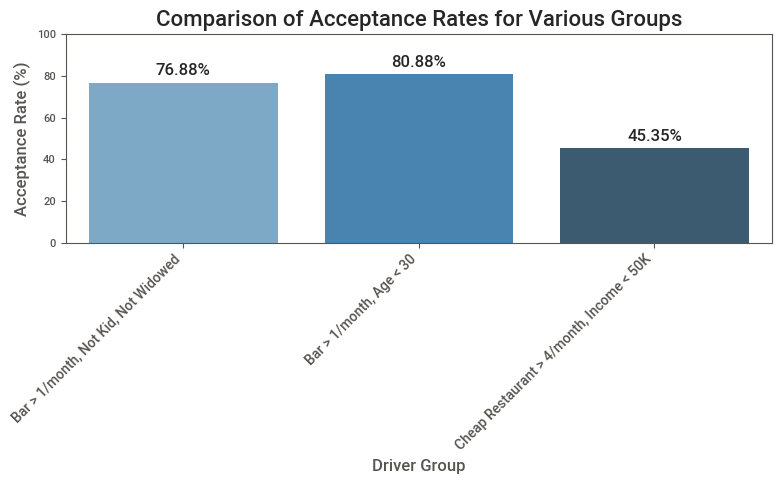

Acceptance rate for drivers who go to a bar more than once a month, have passengers not a kid, and are not widowed: 76.88%
Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30: 80.88%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%


In [309]:
# Prepare the data for plotting
acceptance_rates = {
    "Bar > 1/month, Not Kid, Not Widowed": acceptance_group1,
    "Bar > 1/month, Age < 30": acceptance_group2,
    "Cheap Restaurant > 4/month, Income < 50K": acceptance_group3
}

# Create a DataFrame for easier plotting
df = pd.DataFrame(list(acceptance_rates.items()), columns=["Group", "Acceptance Rate"])

# Set up the plot
plt.figure(figsize=(8, 5))

# Using `hue` to handle color based on the 'Group' column, as per the new warning fix
sns.barplot(x="Group", y="Acceptance Rate", data=df, hue="Group", palette="Blues_d", legend=False)

# Customize the plot
plt.title('Comparison of Acceptance Rates for Various Groups', fontsize=16)
plt.xlabel('Driver Group', fontsize=12)
plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Set y-axis to 100% scale

# Add acceptance rate percentages as labels on top of the bars
for i, v in enumerate(df['Acceptance Rate']):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', va='bottom', fontsize=12)

# Rotate the x-axis labels to 45 degrees for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

# Print the calculated acceptance rates for each group (optional)
print(f"Acceptance rate for drivers who go to a bar more than once a month, have passengers not a kid, and are not widowed: {acceptance_group1:.2f}%")
print(f"Acceptance rate for drivers who go to a bar more than once a month and are under the age of 30: {acceptance_group2:.2f}%")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_group3:.2f}%")


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Bar Coupons Acceptance Analysis

## 1. General Acceptance Rate:
### Accepted Coupons Proportion:
The overall acceptance rate for bar coupons is 41%, meaning a significant portion of people do choose to accept them, but still, the majority does not.

### Hypothesis:
The overall rate suggests that while some individuals are interested in bar coupon offers, other factors like personal preferences, convenience, or availability might influence their decision to not accept them. These factors likely contribute to the majority opting out.

### Why this might be true:
- Some drivers may not frequent bars enough to see the coupons as beneficial.
- Others may not be motivated by bar-related promotions, perhaps because of personal preferences or lifestyle factors like family commitments.

## 2. Bar Visits and Acceptance:
### Accepted Coupons Proportion:
Drivers who go to bars more than 3 times a month have a 76.88% acceptance rate, compared to those who go 3 or fewer times (acceptance rate: 37.06%).

### Hypothesis:
Frequent bar-goers are more likely to accept bar coupons. This suggests that people who visit bars regularly are motivated to take advantage of relevant promotions and discounts.

### Why this might be true:
- Frequent bar-goers likely have a more consistent need for bar-related products and services, making them more receptive to coupon offers that could help reduce their spending on these items.
- Those who visit bars less frequently may not see the coupon as valuable or may feel it is not worth the effort to redeem.

## 3. Age and Acceptance:
### Accepted Coupons Proportion:
Among drivers who visit bars more than once a month, those over 25 have an acceptance rate of 77.21%, while those under 25 have a much lower rate of 38.38%.

### Hypothesis:
Older drivers (over 25) are more likely to accept bar coupons compared to younger drivers. This could be due to a combination of disposable income and more established social habits that make these promotions appealing.

### Why this might be true:
- Older drivers may have more financial stability, enabling them to take advantage of promotional offers, whereas younger drivers may prioritize other spending or might not frequent bars as often.
- Younger drivers may not view bar coupons as valuable or may not have the lifestyle that aligns with the kind of offers provided by the coupons.

## 4. Occupation and Passenger Type:
### Accepted Coupons Proportion:
Drivers who go to a bar more than once a month, have passengers who are not kids, and work in professions other than farming, fishing, or forestry have an acceptance rate of 76.88%, compared to drivers with different characteristics (acceptance rate: 37.07%).

### Hypothesis:
Drivers without children and those in more traditional occupations (not subject to irregular hours) are more likely to accept bar coupons.

### Why this might be true:
- Drivers without children may have more disposable income and flexibility in their schedules, making them more willing to spend on leisure activities like bar visits.
- Drivers in irregular occupations (e.g., farming or fishing) may have less flexibility and may not engage as much in social bar activities, making them less likely to accept bar-related offers.

## 5. Other Factors:
### Accepted Coupons Proportion:
Drivers who go to bars more than once a month and are under 30 have an acceptance rate of 80.88%, while drivers who go to cheap restaurants more than 4 times a month and have income under 50K have a lower acceptance rate of 45.35%.

### Hypothesis:
Younger drivers, especially those under 30, are highly likely to accept bar coupons, while lower-income individuals who frequent cheap restaurants may be less inclined to accept them.

### Why this might be true:
- Younger drivers are often more social and may see bar promotions as appealing, especially if they are frequent bar-goers.
- Lower-income drivers may be more price-sensitive, and while they may visit cheaper restaurants, they may not view the bar coupon as a necessary or valuable expense.

## Key Findings for Bar Coupons Acceptance:
- **Frequent Bar-Goers**: Individuals who visit bars more frequently (more than 3 times a month) are significantly more likely to accept bar coupons (76.88%) compared to those who visit bars less frequently (37.06%).
- **Older Drivers (Over 25)**: Drivers over the age of 25, especially those who visit bars regularly, have a higher acceptance rate (77.21%) compared to younger drivers (38.38%).
- **Drivers Without Children and Non-Irrigated Occupations**: Drivers without children and those in professions with regular schedules (not in farming, fishing, or forestry) have a higher likelihood of accepting bar coupons (76.88%).
- **Price-Sensitive Groups**: Lower-income individuals who frequent cheap restaurants more than four times a month tend to have lower acceptance rates (45.35%) for bar coupons.

## Actionable Recommendations for Bar Coupon Promotions:
- **Target Frequent Bar-Goers**: Focus promotions on individuals who visit bars frequently, as they have a significantly higher likelihood of accepting coupons.
- **Focus on Drivers Over 25**: Market more heavily to drivers over 25, particularly those in stable financial positions, as they are more inclined to accept offers.
- **Consider Family and Occupation**: Tailor offers for individuals without children, especially those in professions with flexible hours, as they show higher coupon acceptance rates.
- **Rethink Strategy for Lower-Income Groups**: For individuals in lower-income brackets, particularly those who visit cheap restaurants often, reconsider the value of bar coupons, as they may be less interested in these offers.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [313]:
# Independent Investigation for coffee_house_coupons
# Filter the data for coffee house coupons
coffee_house_coupons = data[data['coupon'] == 'Coffee House'] 



In [315]:
# Independent Investigation for coffee_house_coupons

# Replace categorical 'age' values with numeric equivalents
coffee_house_coupons['age'] = coffee_house_coupons['age'].astype(str).replace({
    'below21': '20',  # 'below21' can be treated as age 20
    '50plus': '50',   # '50plus' can be treated as age 50 or higher
})

# Convert 'age' column to numeric
coffee_house_coupons['age'] = pd.to_numeric(coffee_house_coupons['age'], errors='coerce')

# Drop rows with NaN values in the relevant columns
coffee_house_coupons = coffee_house_coupons.dropna(subset=['age', 'time', 'temperature', 'expiration'])

# Separate the data into accepted and not accepted coupon groups
accepted_coupons = coffee_house_coupons[coffee_house_coupons['Y'] == 1]
not_accepted_coupons = coffee_house_coupons[coffee_house_coupons['Y'] == 0]

# Age distribution and acceptance rate
print("\nAge-wise Acceptance Rate:")
age_groups = coffee_house_coupons['age'].unique()
for age in age_groups:
    age_accepted = accepted_coupons[accepted_coupons['age'] == age].shape[0]
    age_total = coffee_house_coupons[coffee_house_coupons['age'] == age].shape[0]
    if age_total > 0:
        acceptance_rate = (age_accepted / age_total) * 100
        print(f"Age {age}: {acceptance_rate:.2f}% acceptance rate")

# Time distribution and acceptance rate
print("\nTime-wise Acceptance Rate:")
time_groups = coffee_house_coupons['time'].unique()
for time in time_groups:
    time_accepted = accepted_coupons[accepted_coupons['time'] == time].shape[0]
    time_total = coffee_house_coupons[coffee_house_coupons['time'] == time].shape[0]
    if time_total > 0:
        acceptance_rate = (time_accepted / time_total) * 100
        print(f"Time {time}: {acceptance_rate:.2f}% acceptance rate")

# Temperature distribution and acceptance rate
print("\nTemperature-wise Acceptance Rate:")
temperature_groups = coffee_house_coupons['temperature'].unique()
for temp in temperature_groups:
    temp_accepted = accepted_coupons[accepted_coupons['temperature'] == temp].shape[0]
    temp_total = coffee_house_coupons[coffee_house_coupons['temperature'] == temp].shape[0]
    if temp_total > 0:
        acceptance_rate = (temp_accepted / temp_total) * 100
        print(f"Temperature {temp}°F: {acceptance_rate:.2f}% acceptance rate")

# Expiration distribution and acceptance rate
print("\nExpiration-wise Acceptance Rate:")
expiration_groups = coffee_house_coupons['expiration'].unique()
for expiration_value in expiration_groups:
    expiration_accepted = accepted_coupons[accepted_coupons['expiration'] == expiration_value].shape[0]
    expiration_total = coffee_house_coupons[coffee_house_coupons['expiration'] == expiration_value].shape[0]
    if expiration_total > 0:
        acceptance_rate = (expiration_accepted / expiration_total) * 100
        print(f"Expiration {expiration_value}: {acceptance_rate:.2f}% acceptance rate")





Age-wise Acceptance Rate:
Age 21: 52.43% acceptance rate
Age 46: 51.36% acceptance rate
Age 26: 51.48% acceptance rate
Age 31: 47.67% acceptance rate
Age 41: 50.15% acceptance rate
Age 50: 42.02% acceptance rate
Age 36: 46.77% acceptance rate
Age 20: 69.68% acceptance rate

Time-wise Acceptance Rate:
Time 10AM: 64.07% acceptance rate
Time 2PM: 54.79% acceptance rate
Time 6PM: 41.26% acceptance rate
Time 7AM: 44.58% acceptance rate
Time 10PM: 42.42% acceptance rate

Temperature-wise Acceptance Rate:
Temperature 80°F: 52.98% acceptance rate
Temperature 55°F: 45.58% acceptance rate
Temperature 30°F: 44.34% acceptance rate

Expiration-wise Acceptance Rate:
Expiration 2h: 43.20% acceptance rate
Expiration 1d: 58.39% acceptance rate


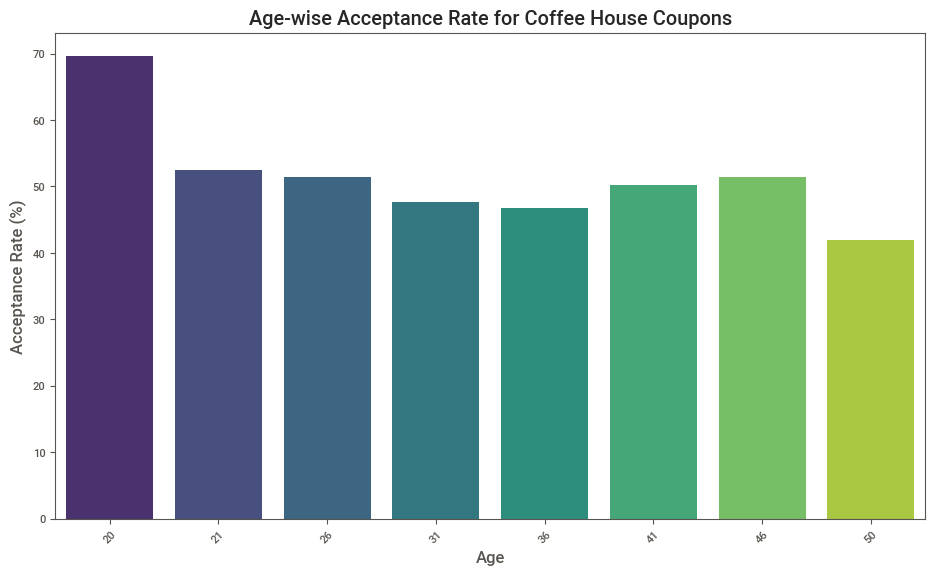

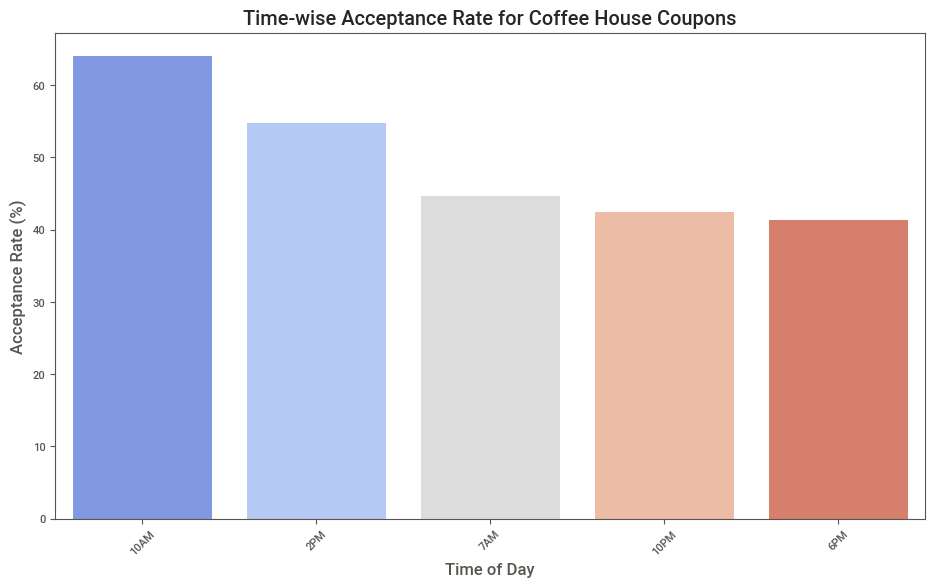

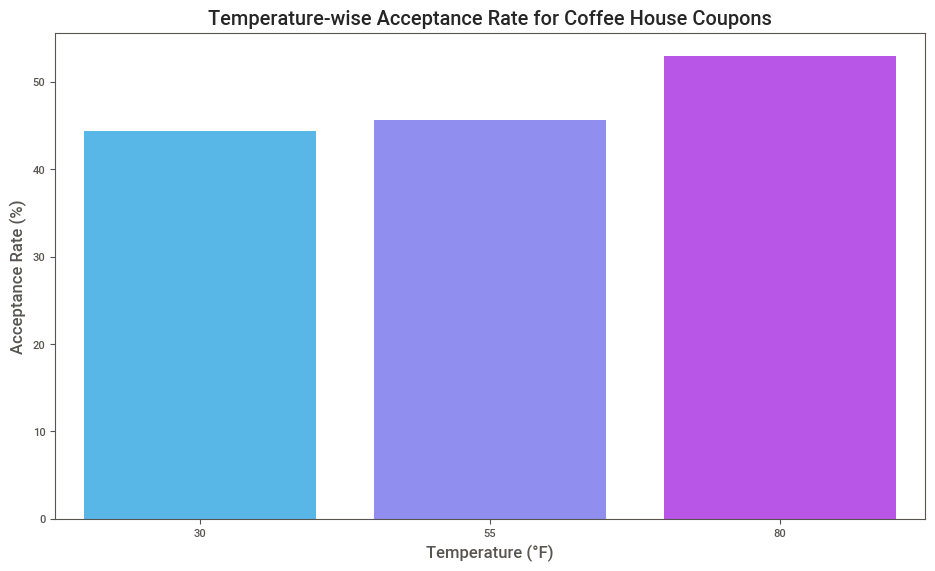

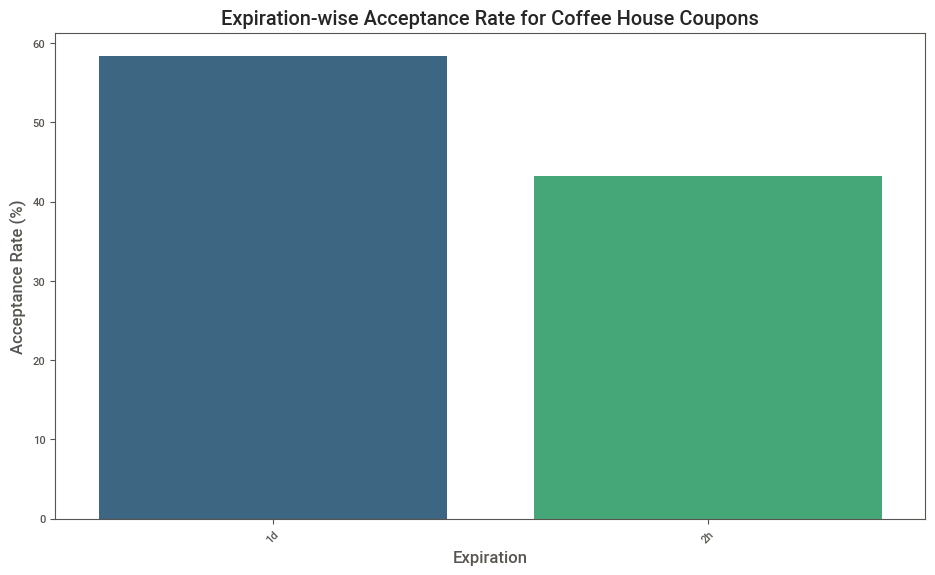

In [317]:
# Age-wise acceptance rate bar plot
plt.figure(figsize=(10,6))
age_acceptance_rates = coffee_house_coupons.groupby('age')['Y'].mean() * 100
age_acceptance_rates = age_acceptance_rates.sort_values(ascending=False)

# Plotting the bar chart
sns.barplot(x=age_acceptance_rates.index, y=age_acceptance_rates.values, palette='viridis')
plt.title('Age-wise Acceptance Rate for Coffee House Coupons')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Time-wise acceptance rate bar plot
plt.figure(figsize=(10,6))
time_acceptance_rates = coffee_house_coupons.groupby('time')['Y'].mean() * 100
time_acceptance_rates = time_acceptance_rates.sort_values(ascending=False)

# Plotting the bar chart
sns.barplot(x=time_acceptance_rates.index, y=time_acceptance_rates.values, palette='coolwarm')
plt.title('Time-wise Acceptance Rate for Coffee House Coupons')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Temperature-wise acceptance rate bar plot
plt.figure(figsize=(10,6))
temperature_acceptance_rates = coffee_house_coupons.groupby('temperature')['Y'].mean() * 100
temperature_acceptance_rates = temperature_acceptance_rates.sort_values(ascending=False)

# Plotting the bar chart
sns.barplot(x=temperature_acceptance_rates.index, y=temperature_acceptance_rates.values, palette='cool')
plt.title('Temperature-wise Acceptance Rate for Coffee House Coupons')
plt.xlabel('Temperature (°F)')
plt.ylabel('Acceptance Rate (%)')
plt.show()


# Expiration-wise acceptance rate bar plot
plt.figure(figsize=(10,6))
expiration_acceptance_rates = coffee_house_coupons.groupby('expiration')['Y'].mean() * 100
expiration_acceptance_rates = expiration_acceptance_rates.sort_values(ascending=False)

# Plotting the bar chart
sns.barplot(x=expiration_acceptance_rates.index, y=expiration_acceptance_rates.values, palette='viridis')
plt.title('Expiration-wise Acceptance Rate for Coffee House Coupons')
plt.xlabel('Expiration')
plt.ylabel('Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Independent Investigation for coffee_house_coupons

# Coffee House Coupons Acceptance Analysis

## 1. Age and Acceptance Rate:
### Accepted Coupons Proportion:
Younger drivers, especially those aged 20, show a significantly higher acceptance rate of **69.68%** compared to other age groups. Drivers around ages **21, 26, and 31** have an acceptance rate between **51%** and **52%**, while older drivers (e.g., aged 50) have a lower acceptance rate of **42.02%**.

### Hypothesis:
Younger drivers are more likely to accept coffee house coupons due to their greater openness to promotions and possibly a more frequent habit of visiting coffee shops.

### Why this might be true:
- Younger drivers may be more inclined to engage with offers or promotions, especially those that cater to their social or habitual needs (like coffee).
- Older drivers, on the other hand, may be less engaged with promotional offers or may prefer other types of activities or purchases, leading to lower coupon acceptance rates.

## 2. Time of Day and Acceptance Rate:
### Accepted Coupons Proportion:
The highest acceptance rate occurs at **10 AM** with **64.07%**, while it drops significantly by **10 PM** to **42.42%**.

### Hypothesis:
The time of day plays a crucial role in whether drivers accept coffee house coupons, with early morning hours being more favorable for coupon acceptance.

### Why this might be true:
- Drivers are likely to be more receptive to promotions in the morning, possibly as part of their routine or when they are starting their day and are more focused on grabbing coffee.
- As the day progresses, drivers may become more distracted, tired, or preoccupied with other tasks, making them less likely to accept offers.

## 3. Temperature and Acceptance Rate:
### Accepted Coupons Proportion:
The acceptance rate is highest at **80°F** with **52.98%**, while it drops to about **45%** at **55°F** and **30°F**.

### Hypothesis:
Warmer temperatures are associated with a higher likelihood of accepting coffee house coupons, as people are more likely to be out and about in pleasant weather.

### Why this might be true:
- Warmer weather encourages people to be more active and outside, possibly visiting coffee shops more frequently, making them more likely to accept related promotions.
- Cooler weather may keep people indoors, reducing their motivation to go out for coffee or engage with coupon offers.

## 4. Expiration and Acceptance Rate:
### Accepted Coupons Proportion:
Coupons with a **1-day expiration** have an acceptance rate of **58.39%**, whereas those with a **2-hour expiration** have a lower acceptance rate of **43.20%**.

### Hypothesis:
Drivers prefer coffee house coupons that provide longer expiration times, as they offer more flexibility and reduce the feeling of being rushed.

### Why this might be true:
- Shorter expiration times may create a sense of urgency, which could discourage people from accepting the coupon if they feel they won't have time to use it.
- Longer expiration times provide more freedom to redeem the offer, making drivers more willing to accept the coupon.

## Key Findings for Coffee House Coupons Acceptance:
- **Younger Drivers (Under 30)**: Younger drivers, particularly those aged **20**, are significantly more likely to accept coffee house coupons (**69.68%**).
- **Morning Hours (10 AM)**: Coupons are most likely to be accepted in the morning, particularly around **10 AM**, with a rate of **64.07%**.
- **Warm Weather (80°F)**: The highest acceptance rates are seen in warmer temperatures, specifically around **80°F** (**52.98%**).
- **Longer Expiration Times**: Coupons with longer expiration times (**1 day**) are more likely to be accepted (**58.39%**) compared to those with shorter expiration periods (**2 hours**).

## Actionable Recommendations for Coffee House Coupon Promotions:
- **Target Younger Drivers**: Focus on younger drivers, particularly those under 30, as they show a higher willingness to engage with coffee house promotions.
- **Optimize for Morning Hours**: Tailor promotions to be most active during morning hours (particularly around **10 AM**), when acceptance rates are highest.
- **Leverage Warm Weather**: Promote coffee house coupons during warmer weather, as people are more likely to accept them when temperatures are around **80°F**.
- **Offer Longer Expiration Periods**: Coupons with longer expiration periods (**1 day**) should be promoted to reduce time pressure on customers, encouraging greater acceptance.
